In [1]:
import numpy as np
import ringity as rng
import networkx as nx
import matplotlib.pyplot as plt

from ringity.network_models.param_utils import (infer_density_parameter,
                                                beta_to_rate
                                                )

## Random regime 

In [2]:
random_state = np.random.randint(2**10)

N = 2**7

beta = np.random.uniform()
response = np.random.uniform()
coupling = np.random.uniform()

rate = beta_to_rate(beta)

In [3]:
def generate_network(return_positions = False, verbose = False):
    G = rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling,
                    return_positions = return_positions,
                    verbose = verbose)
    return G

G, pos = generate_network(return_positions = True, verbose = True)

Response parameter was set to:  r = 0.3302682221467068
Rate parameter was set to: rate = 0.5670766565060401
Coupling parameter was set to:  c = 0.3691407812665053
Density parameter was set to: rho = 0.16635951252417278
general model detected.


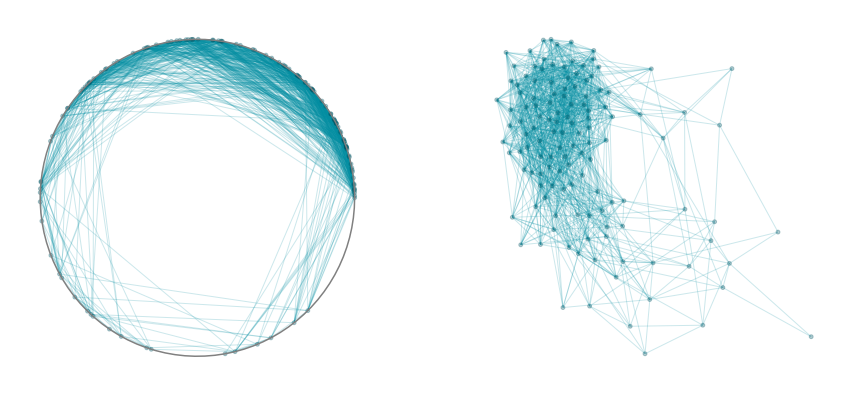

In [4]:
layout = {node : (np.cos(t), np.sin(t)) for node, t in zip(G, pos)}

circle_x = np.cos(np.linspace(0, 2*np.pi, 100))
circle_y = np.sin(np.linspace(0, 2*np.pi, 100))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,7))
ax1.plot(circle_x, circle_y, 'gray')
rng.plot_nx(G, pos = layout, ax = ax1)
rng.plot_nx(G, ax = ax2)

### Checking density inference

In [5]:
G_gen = (rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling) for _ in range(2**5))

obs_density = np.mean(list(map(nx.density, G_gen)))
exp_density = infer_density_parameter(
                        rate = rate,
                        response = response,                                
                        coupling = coupling)

print(obs_density)
print(exp_density)

0.16662309301181102
0.16635951252417278


## Uniform regime ($\beta = 1$)

In [6]:
random_state = np.random.randint(2**10)

N = 2**7

beta = 1
response = np.random.uniform()
coupling = np.random.uniform()

rate = beta_to_rate(beta)

In [7]:
def generate_network(return_positions = False, verbose = False):
    G = rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling,
                    return_positions = return_positions,
                    verbose = verbose)
    return G

G, pos = generate_network(return_positions = True, verbose = True)

Response parameter was set to:  r = 0.482409079276934
Rate parameter was set to: rate = 0.0
Coupling parameter was set to:  c = 0.9995991175855856
Density parameter was set to: rho = 0.482215689960498
GRGG model detected.


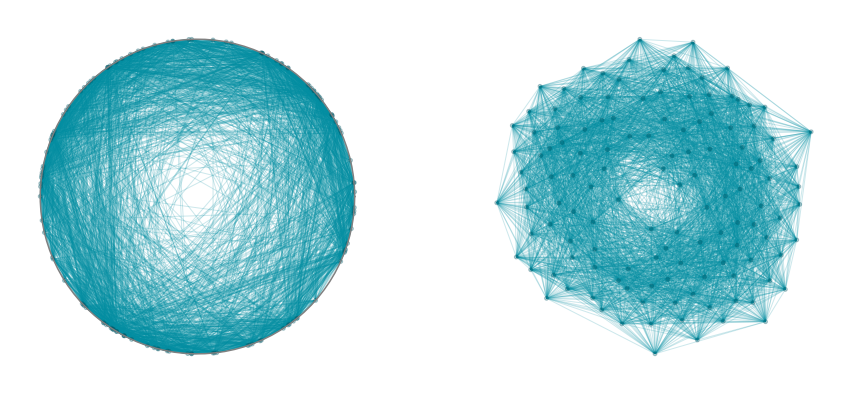

In [8]:
layout = {node : (np.cos(t), np.sin(t)) for node, t in zip(G, pos)}

circle_x = np.cos(np.linspace(0, 2*np.pi, 100))
circle_y = np.sin(np.linspace(0, 2*np.pi, 100))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,7))
ax1.plot(circle_x, circle_y, 'gray')
rng.plot_nx(G, pos = layout, ax = ax1)
rng.plot_nx(G, ax = ax2)

### Checking denisty inference

In [9]:
G_gen = (rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling) for _ in range(2**5))

obs_density = np.mean(list(map(nx.density, G_gen)))
exp_density = infer_density_parameter(
                        rate = rate,
                        response = response,                                
                        coupling = coupling)

print(obs_density)
print(exp_density)

0.48142993356299213
0.482215689960498


## ER regime ($\beta = 0$)

In [10]:
random_state = np.random.randint(2**10)

N = 2**7

beta = 0
response = np.random.uniform()
coupling = np.random.uniform()

rate = beta_to_rate(beta)

In [11]:
def generate_network(return_positions = False, verbose = False):
    G = rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling,
                    return_positions = return_positions,
                    verbose = verbose)
    return G

G, pos = generate_network(return_positions = True, verbose = True)

Response parameter was set to:  r = 0.544556273725351
Rate parameter was set to: rate = inf
Coupling parameter was set to:  c = 0.3226438533948317
Density parameter was set to: rho = 0.3226438533948317
ER_1 model detected.


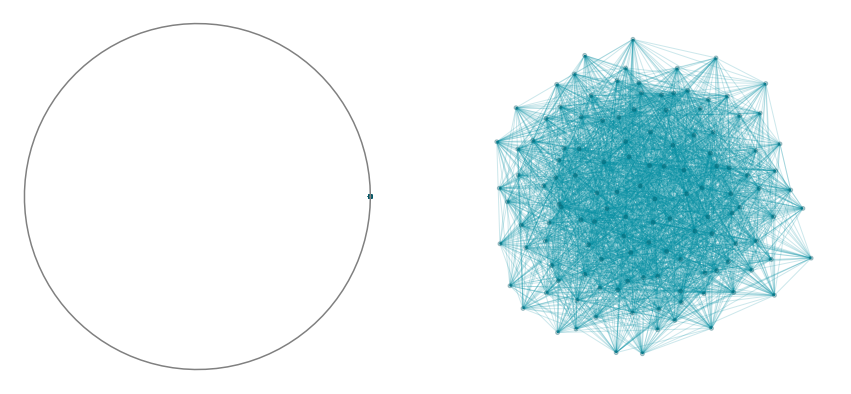

In [12]:
layout = {node : (np.cos(t), np.sin(t)) for node, t in zip(G, pos)}

circle_x = np.cos(np.linspace(0, 2*np.pi, 100))
circle_y = np.sin(np.linspace(0, 2*np.pi, 100))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,7))
ax1.plot(circle_x, circle_y, 'gray')
rng.plot_nx(G, pos = layout, ax = ax1)
rng.plot_nx(G, ax = ax2)

In [13]:
G_gen = (rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling) for _ in range(2**5))

obs_density = np.mean(list(map(nx.density, G_gen)))
exp_density = infer_density_parameter(
                        rate = rate,
                        response = response,                                
                        coupling = coupling)

print(obs_density)
print(exp_density)

0.32256935900590555
0.3226438533948317


## Balanced regime ($r = 0.5$)

In [14]:
random_state = np.random.randint(2**10)

N = 2**7

beta = np.random.uniform()
response = 0.5
coupling = np.random.uniform()

rate = beta_to_rate(beta)

In [17]:
def generate_network(return_positions = False, verbose = False):
    G = rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling,
                    return_positions = return_positions,
                    verbose = verbose)
    return G

G, pos = generate_network(return_positions = True, verbose = True)

Response parameter was set to:  r = 0.5
Rate parameter was set to: rate = 1.1225218974591626
Coupling parameter was set to:  c = 0.4884073983188979
Density parameter was set to: rho = 0.3578242399820619
general model detected.


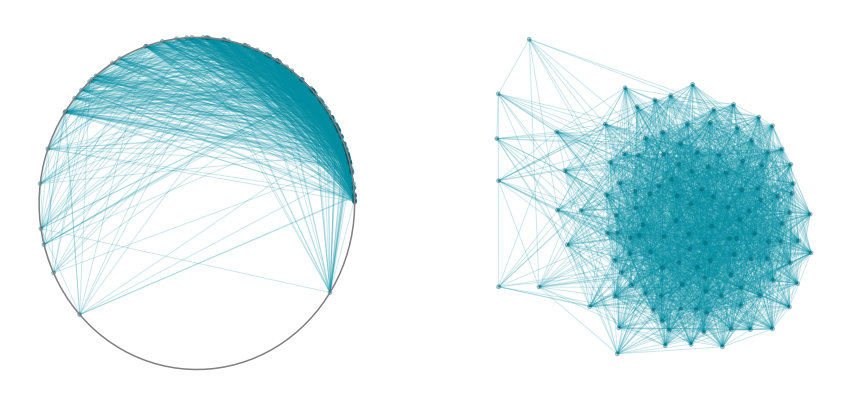

In [18]:
layout = {node : (np.cos(t), np.sin(t)) for node, t in zip(G, pos)}

circle_x = np.cos(np.linspace(0, 2*np.pi, 100))
circle_y = np.sin(np.linspace(0, 2*np.pi, 100))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,7))
ax1.plot(circle_x, circle_y, 'gray')
rng.plot_nx(G, pos = layout, ax = ax1)
rng.plot_nx(G, ax = ax2)

In [19]:
G_gen = (rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling) for _ in range(2**5))

obs_density = np.mean(list(map(nx.density, G_gen)))
exp_density = infer_density_parameter(
                        rate = rate,
                        response = response,                                
                        coupling = coupling)

print(obs_density)
print(exp_density)

0.35839459276574803
0.3578242399820619


## Empty regime ($r = 0$)

In [20]:
random_state = np.random.randint(2**10)

N = 2**7

beta = np.random.uniform()
response = 0.0
coupling = np.random.uniform()

rate = beta_to_rate(beta)

In [22]:
def generate_network(return_positions = False, verbose = False):
    G = rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling,
                    return_positions = return_positions,
                    verbose = verbose)
    return G

G, pos = generate_network(return_positions = True, verbose = True)

AttributeError: Trying to set conflicting values for model: empty2 != empty1

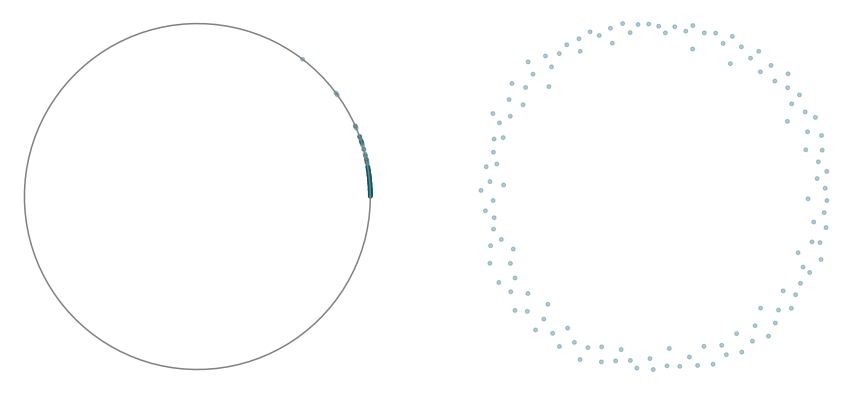

In [20]:
layout = {node : (np.cos(t), np.sin(t)) for node, t in zip(G, pos)}

circle_x = np.cos(np.linspace(0, 2*np.pi, 100))
circle_y = np.sin(np.linspace(0, 2*np.pi, 100))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,7))
ax1.plot(circle_x, circle_y, 'gray')
rng.plot_nx(G, pos = layout, ax = ax1)
rng.plot_nx(G, ax = ax2)

In [21]:
G_gen = (rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling) for _ in range(2**5))

obs_density = np.mean(list(map(nx.density, G_gen)))
exp_density = infer_density_parameter(
                        rate = rate,
                        response = response,                                
                        coupling = coupling)

print(obs_density)
print(exp_density)

0.0
0.0


## ER regime 2 ($r = 1$)

In [25]:
random_state = np.random.randint(2**10)

N = 2**7

beta = np.random.uniform()
response = 1.0
coupling = np.random.uniform()

rate = beta_to_rate(beta)

In [26]:
def generate_network(return_positions = False):
    G = rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling,
                    return_positions = return_positions)
    return G

G, pos = generate_network(return_positions = True)

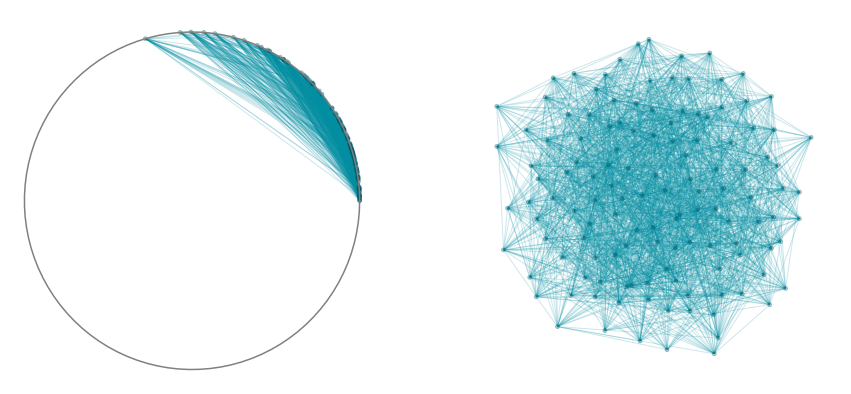

In [27]:
layout = {node : (np.cos(t), np.sin(t)) for node, t in zip(G, pos)}

circle_x = np.cos(np.linspace(0, 2*np.pi, 100))
circle_y = np.sin(np.linspace(0, 2*np.pi, 100))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,7))
ax1.plot(circle_x, circle_y, 'gray')
rng.plot_nx(G, pos = layout, ax = ax1)
rng.plot_nx(G, ax = ax2)

In [28]:
G_gen = (rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling) for _ in range(2**5))

obs_density = np.mean(list(map(nx.density, G_gen)))
exp_density = infer_density_parameter(
                        rate = rate,
                        response = response,                                
                        coupling = coupling)

print(obs_density)
print(exp_density)

0.2749600147637795
0.27407043800192543


## Empty regime 2 ($c = 0$)

In [30]:
random_state = np.random.randint(2**10)

N = 2**7

beta = np.random.uniform()
response = np.random.uniform()
coupling = 0

rate = beta_to_rate(beta)

In [31]:
def generate_network(return_positions = False):
    G = rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling,
                    return_positions = return_positions)
    return G

G, pos = generate_network(return_positions = True)

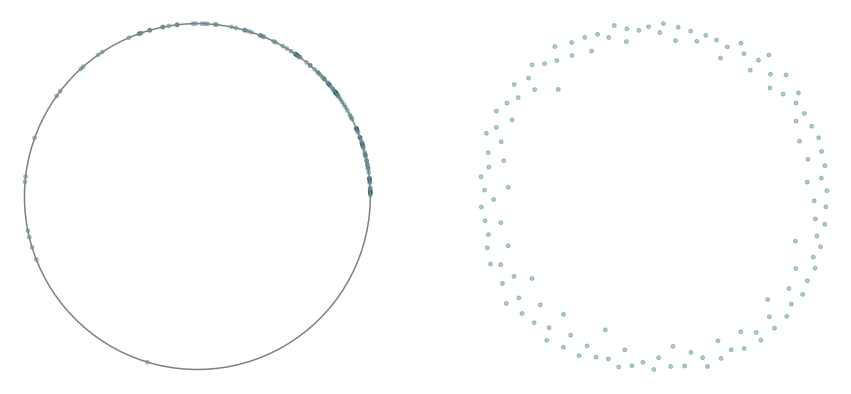

In [32]:
layout = {node : (np.cos(t), np.sin(t)) for node, t in zip(G, pos)}

circle_x = np.cos(np.linspace(0, 2*np.pi, 100))
circle_y = np.sin(np.linspace(0, 2*np.pi, 100))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,7))
ax1.plot(circle_x, circle_y, 'gray')
rng.plot_nx(G, pos = layout, ax = ax1)
rng.plot_nx(G, ax = ax2)

In [33]:
G_gen = (rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling) for _ in range(2**5))

obs_density = np.mean(list(map(nx.density, G_gen)))
exp_density = infer_density_parameter(
                        rate = rate,
                        response = response,                                
                        coupling = coupling)

print(obs_density)
print(exp_density)

0.0
0.0


## Standard regime ($c = 1$)

In [34]:
random_state = np.random.randint(2**10)

N = 2**7

beta = np.random.uniform()
response = np.random.uniform()
coupling = 1

rate = beta_to_rate(beta)

In [35]:
def generate_network(return_positions = False):
    G = rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling,
                    return_positions = return_positions)
    return G

G, pos = generate_network(return_positions = True)

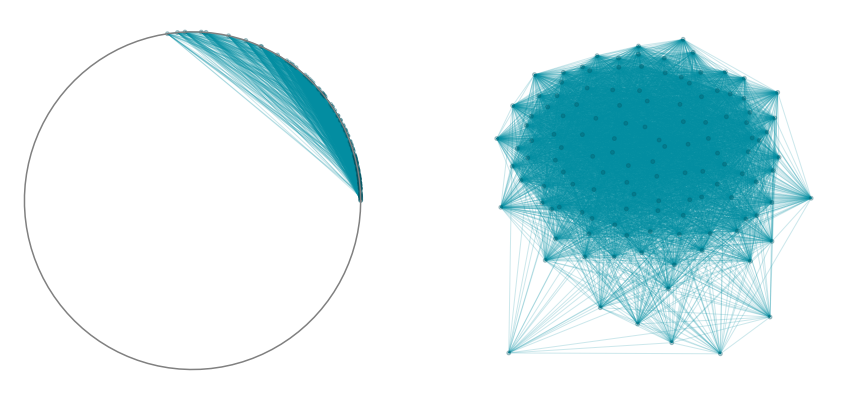

In [36]:
layout = {node : (np.cos(t), np.sin(t)) for node, t in zip(G, pos)}

circle_x = np.cos(np.linspace(0, 2*np.pi, 100))
circle_y = np.sin(np.linspace(0, 2*np.pi, 100))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,7))
ax1.plot(circle_x, circle_y, 'gray')
rng.plot_nx(G, pos = layout, ax = ax1)
rng.plot_nx(G, ax = ax2)

In [37]:
G_gen = (rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling) for _ in range(2**5))

obs_density = np.mean(list(map(nx.density, G_gen)))
exp_density = infer_density_parameter(
                        rate = rate,
                        response = response,                                
                        coupling = coupling)

print(obs_density)
print(exp_density)

0.7842258243110236
0.7890818957540668


## Miscellaneous

### Max density

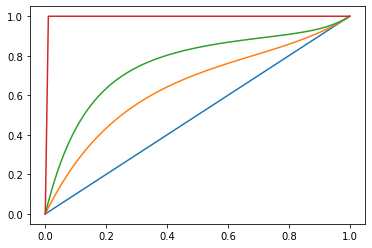

In [24]:
from ringity.network_models.param_utils import max_density

x = np.linspace(0, 1, 100)
y0 = [max_density(0, xi) for xi in x]
y1 = [max_density(1, xi) for xi in x]
y2 = [max_density(2, xi) for xi in x]
yinf = [max_density(np.inf, xi) for xi in x]

plt.plot(x, y0)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, yinf)